
# Investigating FBI Gun Permit Data and U.S. Census Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction
#### The two data sets contained in this analysis are U.S. Census Data with various datapoints ranging from 2010 to 2016. The second dataset is data from the FBI about gun permit background checks in each state. This analysis aims to wrangle, clean, and explore the data to investigate potential correlations and trends. 


In [115]:
#imports various packages for data manipluation and visualization

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### The cell above is importing various modules to manipulate and visualize data.

<a id='wrangling'></a>
# Data Wrangling


In [116]:
# loads in the census csv file with pandas

census = pd.read_csv(r"C:\Users\14802\Desktop\DATA_PROJECTS\udacity_projects\Project_Two_Data_Exploration\U.S. Census Data.csv", index_col=None)

#### Above, I pulled in the US Census data and made it a dataframe saved as the variable "census."

In [117]:
# sets index for dataframe as 'fact' column, which is where state names are located

census.set_index('Fact', inplace=True)

####  Here I set the index of the dataframe to the "Facts" column, where the state names are located. 

In [118]:
#pivots daatframe so columns and rows are reversed

census = census.transpose()

#### I transpose the data here to make the state information the rows with the different aspects of the data (such as population estimations and household income, etc, the columns.

In [119]:
census.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
0,1,2,3,4,5,6,7,8,9,10,...,66,66,66,66,66,66,66,66,66,66
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Either no or too few sample observations were ...,Suppressed to avoid disclosure of confidential...,Fewer than 25 firms,Footnote on this item in place of data,Not available,Suppressed; does not meet publication standards,Not applicable,Value greater than zero but less than half uni...
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### I check the top five rows of the data to see if it was transposed correctly and what else needs to be done.

In [120]:
# here, the census dataframe is pared down to only the columns listed below

census = census[['Population estimates, July 1, 2016,  (V2016)','Population, Census, April 1, 2010','Veterans, 2011-2015', 'Housing units,  July 1, 2016,  (V2016)', 'Housing units, April 1, 2010', 'Households, 2011-2015','High school graduate or higher, percent of persons age 25 years+, 2011-2015', "Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015", 'Median household income (in 2015 dollars), 2011-2015', 'Persons in poverty, percent','Population per square mile, 2010', 'Land area in square miles, 2010']]

#### Here, I change the census dataframe to include only the columns I am potentially interested in analyzing. 

In [121]:
# this drops the '0' (old index) and 'Fact Note' rows, because their values do not relate to the other data

census.drop(index={'0','Fact Note'}, inplace=True)
census.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population, Census, April 1, 2010","Veterans, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Households, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Persons in poverty, percent","Population per square mile, 2010","Land area in square miles, 2010"
Alabama,"4,863,300","4,779,736","363,170","2,230,185","2,171,853","1,848,325",84.30%,23.50%,"$43,623",17.10%,94.4,"50,645.33"
Alaska,"741,894","710,231","69,323","310,658","306,967","250,969",92.10%,28.00%,"$72,515",9.90%,1.2,"570,640.95"
Arizona,"6,931,071","6,392,017","505,794","2,961,003","2,844,526","2,412,212",86.00%,27.50%,"$50,255",16.40%,56.3,"113,594.08"
Arkansas,"2,988,248","2,915,918","220,953","1,354,762","1,316,299","1,138,025",84.80%,21.10%,"$41,371",17.20%,56,"52,035.48"
California,"39,250,017","37,253,956","1,777,410","14,060,525","13,680,081","12,717,801",81.80%,31.40%,"$61,818",14.30%,239.1,"155,779.22"


#### I drop the rows labeled "0" and "Fact Note" to further clean up the dataframe, then take a look at the first five rows again.

In [122]:
# renames columns for easier manipulation with python by removing spaces

census.columns = ['pop_2016','pop_2010','veterans_2011-2015','housing_units_2016','housing_units_2010','households_2011-2015','hs_grad','undergrad','household_income','poverty_level','pop_per_sq_mile','land_per_sq_mile']
census.head()

,pop_2016,pop_2010,veterans_2011-2015,housing_units_2016,housing_units_2010,households_2011-2015,hs_grad,undergrad,household_income,poverty_level,pop_per_sq_mile,land_per_sq_mile
Alabama,"4,863,300","4,779,736","363,170","2,230,185","2,171,853","1,848,325",84.30%,23.50%,"$43,623",17.10%,94.4,"50,645.33"
Alaska,"741,894","710,231","69,323","310,658","306,967","250,969",92.10%,28.00%,"$72,515",9.90%,1.2,"570,640.95"
Arizona,"6,931,071","6,392,017","505,794","2,961,003","2,844,526","2,412,212",86.00%,27.50%,"$50,255",16.40%,56.3,"113,594.08"
Arkansas,"2,988,248","2,915,918","220,953","1,354,762","1,316,299","1,138,025",84.80%,21.10%,"$41,371",17.20%,56,"52,035.48"
California,"39,250,017","37,253,956","1,777,410","14,060,525","13,680,081","12,717,801",81.80%,31.40%,"$61,818",14.30%,239.1,"155,779.22"


#### I then change the column names to be shorter and more accessible to writing in python, such as removing spaces and replacing them with underscores. 

In [123]:
# this dataset was provided as an excel file, so the code below converts it into a csv file before further analysis

guns_xlsx = pd.read_excel(r"C:\Users\14802\Desktop\DATA_PROJECTS\udacity_projects\Project_Two_Data_Exploration\gun_data.xlsx", index_col=None)
guns_xlsx.to_csv('gun_data.csv', encoding='utf-8', index=False)
guns = pd.read_csv('gun_data.csv')

#### Here I pulled in the gun data and converted it into a csv file instead of the xlsx format it was initially downloaded as. 

In [124]:
guns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

#### I take a quick look at the info of the dataframe to get a feel for the dataset. 

In [125]:
# pares down gun dataframe to only the columns listed below

guns = guns[['month', 'state','permit','handgun','long_gun','other','multiple','totals']]
guns.head()

,month,state,permit,handgun,long_gun,other,multiple,totals
0,2017-09,Alabama,16717.0,5734.0,6320.0,221.0,317,32019
1,2017-09,Alaska,209.0,2320.0,2930.0,219.0,160,6303
2,2017-09,Arizona,5069.0,11063.0,7946.0,920.0,631,28394
3,2017-09,Arkansas,2935.0,4347.0,6063.0,165.0,366,17747
4,2017-09,California,57839.0,37165.0,24581.0,2984.0,0,123506


#### Before moving on to cleaning the data, I change the guns dataframe to contain only the columns I am potentially interested in analyzing. 

# Data Cleaning

#### From my initial check, I see that I need to change the 'Month' column into a date which will be more useful for manipulating the data.

In [126]:
# converts 'month' value to datetime to further enable maniplutation of the month and year in the dataframe 

guns['month'] = pd.to_datetime(guns['month'], yearfirst=True)

In [127]:
guns['year'] = guns['month'].dt.year

In [128]:
guns['month'] = guns['month'].dt.month

In [129]:
# reorders columns to put year and month at beginning of row values

guns = guns.reindex(columns=['year','month','state','permit','handgun','long_gun','other','multiple','totals'])
guns.head()

,year,month,state,permit,handgun,long_gun,other,multiple,totals
0,2017,9,Alabama,16717.0,5734.0,6320.0,221.0,317,32019
1,2017,9,Alaska,209.0,2320.0,2930.0,219.0,160,6303
2,2017,9,Arizona,5069.0,11063.0,7946.0,920.0,631,28394
3,2017,9,Arkansas,2935.0,4347.0,6063.0,165.0,366,17747
4,2017,9,California,57839.0,37165.0,24581.0,2984.0,0,123506


#### I extract the month and year from the initial 'month' object, and turn them into new, seperate columns. 

In [130]:
# converts month column back to datetime to extract month name instead of month number

guns['month'] = pd.to_datetime(guns['month'])
guns['month'] = guns['month'].dt.month_name()
guns.head()

,year,month,state,permit,handgun,long_gun,other,multiple,totals
0,2017,January,Alabama,16717.0,5734.0,6320.0,221.0,317,32019
1,2017,January,Alaska,209.0,2320.0,2930.0,219.0,160,6303
2,2017,January,Arizona,5069.0,11063.0,7946.0,920.0,631,28394
3,2017,January,Arkansas,2935.0,4347.0,6063.0,165.0,366,17747
4,2017,January,California,57839.0,37165.0,24581.0,2984.0,0,123506


#### For better readability, I also change the month number to the month name using the datetime package.

In [131]:
# finds rows only where year is equal to 2010

guns_2010 = guns.query('year == 2010')
guns_2010.drop(columns={'year'}, inplace=True)

# groups data by state and sums values so numbers are per state per year instead of months 

guns_2010 = guns_2010.groupby('state').sum()
guns_2010.head()

C:\Users\14802\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,permit,handgun,long_gun,other,multiple,totals
state,,,,,,
Alabama,4621.0,116963.0,136519.0,1771.0,5465,308607
Alaska,0.0,25720.0,33177.0,825.0,1519,65909
Arizona,24751.0,89162.0,69067.0,2091.0,3768,206050
Arkansas,31305.0,49992.0,72206.0,636.0,3145,191448
California,295252.0,245159.0,275458.0,0.0,0,816399


#### Because I know my census data only has data points for 2010-2016, I extract the data from the guns dataframe where the year is 2010 and put it into a new dataframe. I also drop the year, because all values will be from 2010, then I group it by state and look at the sum of the values in 2010 for each state.

In [132]:
# finds rows only where year is equal to 2016
guns_2016 = guns.query('year == 2016')

In [133]:
# groups data by state and sums values so numbers are per state per year instead of months 

guns_2016 = guns_2016.groupby('state').sum()

In [134]:
guns_2016.drop(columns={'year'}, inplace=True)
guns_2016.head()

,permit,handgun,long_gun,other,multiple,totals
state,,,,,,
Alabama,291039.0,153123.0,121963.0,6104.0,6545,616947
Alaska,3121.0,37491.0,36887.0,2889.0,2316,87647
Arizona,87771.0,166784.0,108988.0,13122.0,7908,416279
Arkansas,55456.0,80244.0,82120.0,3059.0,4400,266014
California,1036981.0,560355.0,554550.0,211707.0,0,2377167


#### I do the same thing for gun data in 2016 and save it to a new dataframe. 

In [135]:
guns_2010.columns = [col + '_2010' for col in guns_2010.columns]
guns_2016.columns = [col + '_2016' for col in guns_2016.columns]

#### For clarity, I decided to append each column name with the respective year before I merge these dataframes.

In [136]:
# merges the 2010 and 2016 gun dataframes into one

guns_2010_2016 = pd.merge(guns_2010, guns_2016, on='state')

In [137]:
# reorganizes columns so 2010 and 2016 values are next to each other in each category

guns_2010_2016 = guns_2010_2016.reindex(columns=['permit_2010', 'permit_2016','handgun_2010','handgun_2016','long_gun_2010','long_gun_2016','other_2010','other_2016','multiple_2010','multiple_2016','totals_2010','totals_2016'])

In [138]:
guns_2010_2016.head()

,permit_2010,permit_2016,handgun_2010,handgun_2016,long_gun_2010,long_gun_2016,other_2010,other_2016,multiple_2010,multiple_2016,totals_2010,totals_2016
state,,,,,,,,,,,,
Alabama,4621.0,291039.0,116963.0,153123.0,136519.0,121963.0,1771.0,6104.0,5465,6545,308607,616947
Alaska,0.0,3121.0,25720.0,37491.0,33177.0,36887.0,825.0,2889.0,1519,2316,65909,87647
Arizona,24751.0,87771.0,89162.0,166784.0,69067.0,108988.0,2091.0,13122.0,3768,7908,206050,416279
Arkansas,31305.0,55456.0,49992.0,80244.0,72206.0,82120.0,636.0,3059.0,3145,4400,191448,266014
California,295252.0,1036981.0,245159.0,560355.0,275458.0,554550.0,0.0,211707.0,0,0,816399,2377167


#### I merged the dataframes, then changed the order of the columns so each type of data was next to each other for 2010 and 2016.

In [139]:
# merges the census and gun dataframes
df_all = census.join(guns_2010_2016)
df_all.head()

,pop_2016,pop_2010,veterans_2011-2015,housing_units_2016,housing_units_2010,households_2011-2015,hs_grad,undergrad,household_income,poverty_level,...,handgun_2010,handgun_2016,long_gun_2010,long_gun_2016,other_2010,other_2016,multiple_2010,multiple_2016,totals_2010,totals_2016
Alabama,"4,863,300","4,779,736","363,170","2,230,185","2,171,853","1,848,325",84.30%,23.50%,"$43,623",17.10%,...,116963.0,153123.0,136519.0,121963.0,1771.0,6104.0,5465,6545,308607,616947
Alaska,"741,894","710,231","69,323","310,658","306,967","250,969",92.10%,28.00%,"$72,515",9.90%,...,25720.0,37491.0,33177.0,36887.0,825.0,2889.0,1519,2316,65909,87647
Arizona,"6,931,071","6,392,017","505,794","2,961,003","2,844,526","2,412,212",86.00%,27.50%,"$50,255",16.40%,...,89162.0,166784.0,69067.0,108988.0,2091.0,13122.0,3768,7908,206050,416279
Arkansas,"2,988,248","2,915,918","220,953","1,354,762","1,316,299","1,138,025",84.80%,21.10%,"$41,371",17.20%,...,49992.0,80244.0,72206.0,82120.0,636.0,3059.0,3145,4400,191448,266014
California,"39,250,017","37,253,956","1,777,410","14,060,525","13,680,081","12,717,801",81.80%,31.40%,"$61,818",14.30%,...,245159.0,560355.0,275458.0,554550.0,0.0,211707.0,0,0,816399,2377167


#### Here, I merged the two dataframs (census and gun data from 2010 and 2016) into one dataframe called "df_all." Here, I saw more data that needed to be cleaned. 

In [140]:
#checking dataframe types to see which columns need to be converted to different data types

df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   pop_2016              50 non-null     object 
 1   pop_2010              50 non-null     object 
 2   veterans_2011-2015    50 non-null     object 
 3   housing_units_2016    50 non-null     object 
 4   housing_units_2010    50 non-null     object 
 5   households_2011-2015  50 non-null     object 
 6   hs_grad               50 non-null     object 
 7   undergrad             50 non-null     object 
 8   household_income      50 non-null     object 
 9   poverty_level         50 non-null     object 
 10  pop_per_sq_mile       50 non-null     object 
 11  land_per_sq_mile      50 non-null     object 
 12  permit_2010           50 non-null     float64
 13  permit_2016           50 non-null     float64
 14  handgun_2010          50 non-null     float64
 15  handgun_2016       

#### As seen above, there are several values which were stored as objects (strings), which needed to be fixed before analysis. 

In [141]:
#The following is a funciton to remove commas and turn the string into an integer, which will be applied to multiple columns

def remove_commas(df_col):
    return (df_col).str.replace(',', '').astype(int)

In [142]:
#implements the remove_comma function written above, which removes commas then converts value into integer

df_all['pop_2016'] = remove_commas(df_all['pop_2016'])

In [143]:
df_all['pop_2010'] = remove_commas(df_all['pop_2010'])

In [144]:
df_all['veterans_2011-2015'] = remove_commas(df_all['veterans_2011-2015'])

In [145]:
df_all['housing_units_2010'] = remove_commas(df_all['housing_units_2010'])

In [146]:
df_all['housing_units_2016'] = remove_commas(df_all['housing_units_2016'])

In [147]:
df_all['households_2011-2015'] = remove_commas(df_all['households_2011-2015'])

In [148]:
#because this value is being changed into a float (not an integer), the 'remove_commas' funciton does not apply

df_all['pop_per_sq_mile'] = df_all['pop_per_sq_mile'].str.replace(',','').astype(float)

In [149]:
#because this value is being changed into a float (not an integer), the 'remove_commas' funciton does not apply

df_all['land_per_sq_mile'] = df_all['land_per_sq_mile'].str.replace(',','').astype(float)

In [150]:
#this value needs an extra dollar sign removed before it is converted to an integer, so the remove_comma function was not applied

df_all['household_income'] = df_all['household_income'].str.replace(',', '').str.replace('$', '').astype(int)

C:\Users\14802\AppData\Local\Temp/ipykernel_8200/4133228980.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_all['household_income'] = df_all['household_income'].str.replace(',', '').str.replace('$', '').astype(int)


In [151]:
#checking to see if converting the objects into integers and floats was successful
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   pop_2016              50 non-null     int32  
 1   pop_2010              50 non-null     int32  
 2   veterans_2011-2015    50 non-null     int32  
 3   housing_units_2016    50 non-null     int32  
 4   housing_units_2010    50 non-null     int32  
 5   households_2011-2015  50 non-null     int32  
 6   hs_grad               50 non-null     object 
 7   undergrad             50 non-null     object 
 8   household_income      50 non-null     int32  
 9   poverty_level         50 non-null     object 
 10  pop_per_sq_mile       50 non-null     float64
 11  land_per_sq_mile      50 non-null     float64
 12  permit_2010           50 non-null     float64
 13  permit_2016           50 non-null     float64
 14  handgun_2010          50 non-null     float64
 15  handgun_2016       

#### In the code cells above, I took out commas and dollar signs from the values and converted the strings into integers so they could be used in anaysis.

In [152]:
# below I get the gun permits per capita by dividing the total gun permits by the population for the given year
df_all['permits_per_capita_2010'] = df_all['totals_2010']/df_all['pop_2010']

In [153]:
df_all['permits_per_capita_2016'] = df_all['totals_2016']/df_all['pop_2016']

In [154]:
# below I find the percentage change in gun permits per capita for each given year
df_all['%_permits_pc_increase'] = ((df_all['permits_per_capita_2016'] - df_all['permits_per_capita_2010'])/df_all['permits_per_capita_2016'])*100

In [155]:
df_all.head()

,pop_2016,pop_2010,veterans_2011-2015,housing_units_2016,housing_units_2010,households_2011-2015,hs_grad,undergrad,household_income,poverty_level,...,long_gun_2016,other_2010,other_2016,multiple_2010,multiple_2016,totals_2010,totals_2016,permits_per_capita_2010,permits_per_capita_2016,%_permits_pc_increase
Alabama,4863300,4779736,363170,2230185,2171853,1848325,84.30%,23.50%,43623,17.10%,...,121963.0,1771.0,6104.0,5465,6545,308607,616947,0.064566,0.126858,49.103834
Alaska,741894,710231,69323,310658,306967,250969,92.10%,28.00%,72515,9.90%,...,36887.0,825.0,2889.0,1519,2316,65909,87647,0.092799,0.118140,21.449329
Arizona,6931071,6392017,505794,2961003,2844526,2412212,86.00%,27.50%,50255,16.40%,...,108988.0,2091.0,13122.0,3768,7908,206050,416279,0.032236,0.060060,46.327658
Arkansas,2988248,2915918,220953,1354762,1316299,1138025,84.80%,21.10%,41371,17.20%,...,82120.0,636.0,3059.0,3145,4400,191448,266014,0.065656,0.089020,26.245645
California,39250017,37253956,1777410,14060525,13680081,12717801,81.80%,31.40%,61818,14.30%,...,554550.0,0.0,211707.0,0,0,816399,2377167,0.021914,0.060565,63.816529


#### I decided to find the gun permits per capita for 2010 and 2016 by using the total gun permit vales and the population estimates. I added the permits per capita for each state as new columns, as well as the percent increase in gun permits per capita in 2010 and 2016. I'm now happy to start analyzing the data in my dataframe.

<a id='eda'></a>
# Exploratory Data Analysis

### Which state had the most gun permits per capita?

In [156]:
#sorts the 'permits per capits 2016' column values in descending order
pc_by_state = df_all['permits_per_capita_2016'].sort_values(ascending=False)

In [157]:
#creates a new dataframe with the sorted valeus in descending order by state
df_pc_by_state_2016  = pd.DataFrame(pc_by_state).reset_index()
df_pc_by_state_2016.columns = ['State', 'Gun Permits Per Capita 2016']
df_pc_by_state_2016

,State,Gun Permits Per Capita 2016
0,Kentucky,0.828683
1,Indiana,0.216601
2,Illinois,0.150300
3,West Virginia,0.132352
4,Montana,0.130776
5,South Dakota,0.129321
6,Alabama,0.126858
7,New Hampshire,0.123737
8,Alaska,0.118140
9,Minnesota,0.118044


#### Here, I sorted the states in descending order according to their gun permits per capita in 2016. I saved the result to a new dataframe and renamed the columns to aid in my subsequent data visualization. We see here that Kentucky has the highest number of gun permits per capita by far. 

Text(0, 0.5, 'Gun Permits Per Capita')

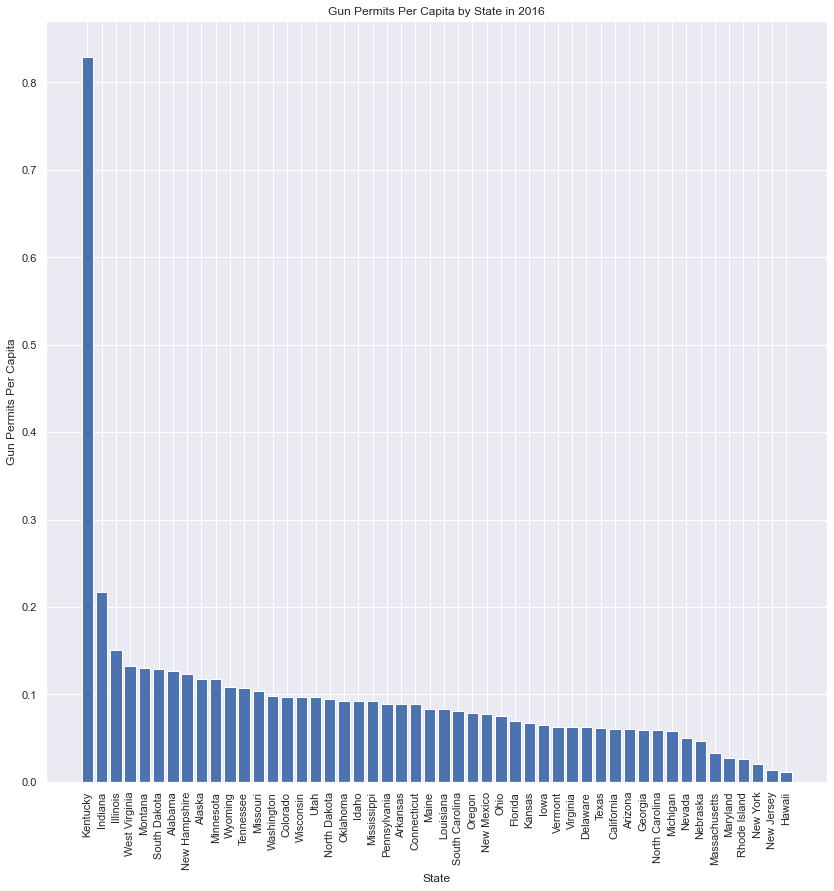

In [158]:
# sets x and y axis values to plot
x = df_pc_by_state_2016['State']
y = df_pc_by_state_2016['Gun Permits Per Capita 2016']

#changes figure size to better display all 50 values in X axis
fig = plt.figure(figsize=(14,14))
plt.bar(x,y)

plt.title('Gun Permits Per Capita by State in 2016')

plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Gun Permits Per Capita')

#### Above, I plotted a bar graph showing the amount of gun permits per capita by state in 2016. The visualization makes the difference between each state more apparent and easy to see.

### What is the overall trend in gun permit numbers across the nation?

In [159]:
#sets data frame of permits per capita by state for both 2010 and 2016
permits_pc_change = df_all[['permits_per_capita_2010', 'permits_per_capita_2016']]
permits_pc_change_by_state = pd.DataFrame(permits_pc_change).reset_index()
permits_pc_change_by_state.columns = ['state', 'permits_per_capita_2010', 'permits_per_capita_2016']
permits_pc_change.head()

,permits_per_capita_2010,permits_per_capita_2016
Alabama,0.064566,0.126858
Alaska,0.092799,0.118140
Arizona,0.032236,0.060060
Arkansas,0.065656,0.089020
California,0.021914,0.060565


#### Here, I made a dataframe with the gun permits per capita for each state in both 2010 and 2016. These will be used for a visualization of whether the number of gun permits per capita increased or decrease between 2010 and 2016. 

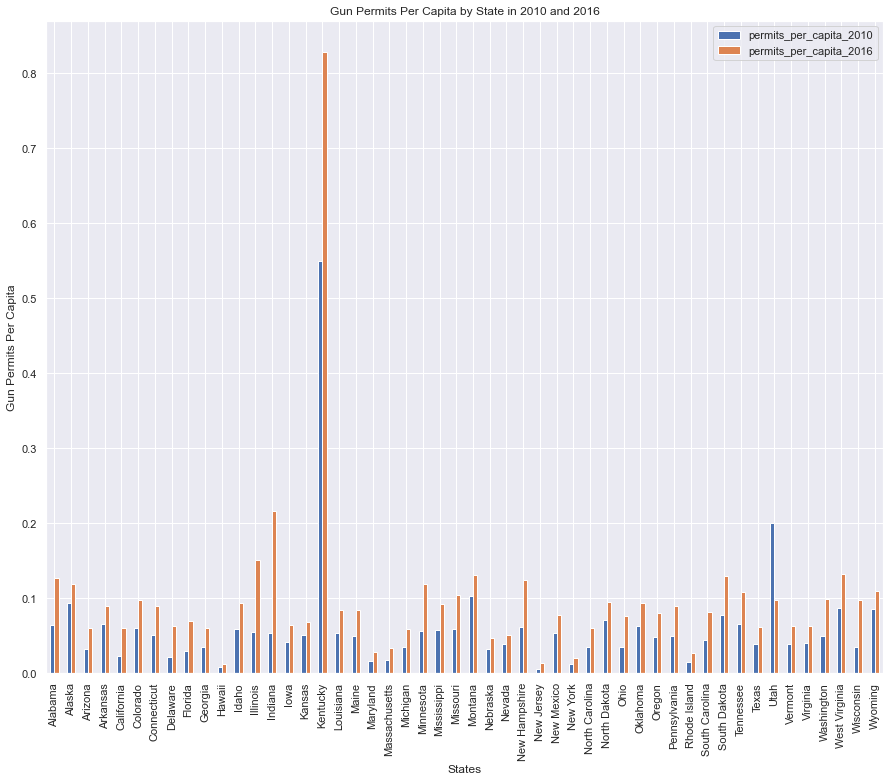

In [160]:
#creates bar graph with each state and their respective gun permits per capita in 2010 and 2016

ax = permits_pc_change_by_state.plot(kind='bar', title='Gun Permits Per Capita by State in 2010 and 2016', figsize=(15,12));
ax.set_xlabel('States');
ax.set_ylabel('Gun Permits Per Capita');
ax.set_xticklabels(permits_pc_change_by_state.state);

#### Here, I made a bar graph with different colored bars for 2010 and 2016, which shows the gun permits per capita in each respective year. Looking at this graph, it is apparent the amount of gun permits per capita increased in almost every state, excluding Utah. 

In [161]:
#finds the mean for the gun permits per capita in 2010 and 2016

permits_mean = permits_pc_change.mean()
permits_mean = permits_mean.reset_index()
permits_mean.columns = ['Year', 'Mean Gun Permits Per Capita']
permits_mean

,Year,Mean Gun Permits Per Capita
0,permits_per_capita_2010,0.060127
1,permits_per_capita_2016,0.097695


#### Above, I decided to make a dataframe with the mean gun permits per capita across all states. 

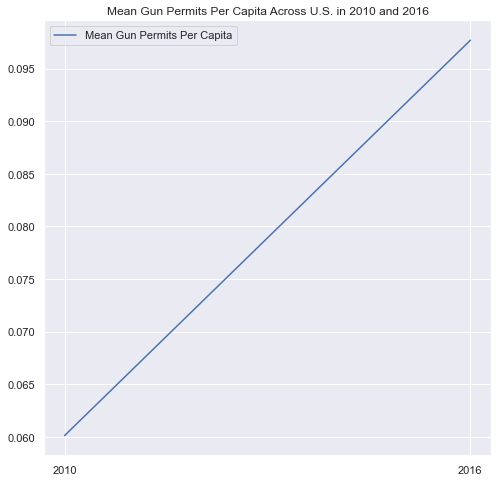

In [162]:
#plots the mean of gun permits per capita in 2010 and 2016 with a line chart which displays positive trend

ax1 = permits_mean.plot(kind='line', figsize=(8,8))
ax1.set_title('Mean Gun Permits Per Capita Across U.S. in 2010 and 2016')
plt.xticks([0,1],['2010', '2016']);

#### Above, the mean number of gun permits per capita is shown for both 2010 and 2016, showing the overall trend of an increase in the number of gun permits across the nation.

## Bonus Analysis: Are there any apparent correlations in the U.S. Census data with the amount of gun permits per capita in each state?

After answering my two initial questions, I decided to see if other data in the census dataframe was correlated to the number of gun permits per capita in each state. I did this by using the 'pearsonr' method from the scipy library to check the correlation between two columns.

In [163]:
#imports the pearsonr method from the scipy library

from scipy.stats import pearsonr

In [164]:
"""In each of the returned tuples under the code cells above, the first number in the tuple is the coefficient 
(ranging from -1 to 1), and the second number is the "p-value." The p-value aims to measure the significance of 
the correlation. For the first number, a result close to -1 or 1 would imply a negative or positive correlation 
of the values, respectively. The p-value is generally accepted as significant if it is lower than .05. """

#uses pearsonr algorithim on two dataframe columns to look for potential correlations

pearsonr(df_all['veterans_2011-2015'], df_all['permits_per_capita_2016'])

(-0.09091647886666615, 0.5300570507431169)

In [165]:
pearsonr(df_all['household_income'], df_all['permits_per_capita_2016'])

(-0.2640629941999352, 0.06387923273058413)

In [166]:
pearsonr(df_all['land_per_sq_mile'], df_all['permits_per_capita_2016'])

(0.007805645852992309, 0.9570952965070477)

In [167]:
pearsonr(df_all['pop_per_sq_mile'], df_all['permits_per_capita_2016'])

(-0.20247948159245935, 0.1584841128677966)

As seen above, none of the data ran through the pearsonr method above are shown to be correlated or be statistically significant to each other. Therefore, although it was fun to test and check for correlation, no conclusion or inferences can be made based on these results. 

<a id='conclusions'></a>
# Conclusions

By gathering, cleaning, analyzing, and visualizing this data, I was able to answer the following two questions: 

1) In 2016, which state had the most gun permits per capita?

2) Between 2010 and 2016, what was the overall trend for the number of gun permits per capita in each state and the U.S. overall?

From the data, I concluded Kentucky was the state with the most gun permits per capita. In addition, the data showed the number of gun permits per capita in each state except for Utah increased from 2010 to 2016.

There were no other correlations or statistically significant findings from the analysis which was conducted. Limitations may exist in the data. Furthermore, it is important to recognize the number of gun permits in each state is not necessarily a representation of the number of guns owned or purchased, as each states' laws vary greatly as far as when and why a permit is required to purchase a gun. 

To make any additional inferences or predictions, additional data would need to be gathered and analyzed.